# Optimización Bayesiana

**Teorema de Bayes**

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

$ P(A|B) $: Probabilidad condicional de A dado B. También conocida como la probabilidad posterior de A dado que B ocurre.

$ P(B|A) $: Probabilidad condicional de B dado A. Se interpreta como la verosimilitud (*likelihood*) de A.

$ P(A) $: Probabilidad de observar A. También conocida como probabilidad a priori.

$ P(B) $: Probabilidad de observar B. Interpretada como evidencia.

Utilizando las definiciones de arriba actualizamos la definición del teorema de bayes:

$$ \text{posterior} = \frac{(\text{verosimilitud})(\text{anterior})}{\text{evidencia}} $$

La intuición es que el teorema de Bayes es una herramienta para actualizar nuestras creencias dado lo que se tenía antes y nueva evidencia. Por ejemplo, tomas una moneda y asumes que es una moneda justa, dado que es lo más probable y que las monedas suelen ser justas en tu experiencia. Lanzas la moneda tres veces y cae sello las tres veces; un poco extraño, así que ajustas tus creencias y empiezas a imaginar que la moneda no es tan justa como debería ser. Lanzas las monedas tres veces y cae águila; ahora crees que la moneda es justa de nuevo.

## ¿Cómo aplicamos esto en nuestra vida diaria?

Imagina que tienes 3 puntos (conocimiento previo) en un espacio.

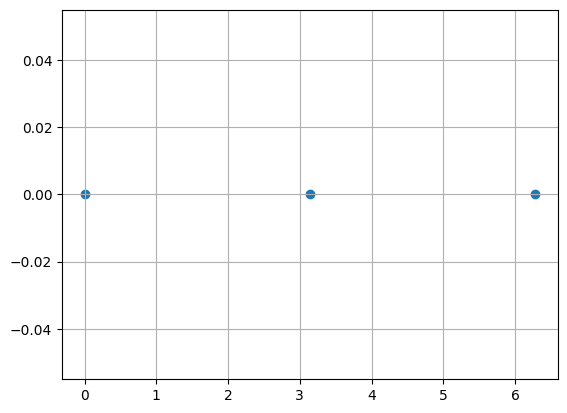

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(); plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0]); plt.grid()

No hay seguridad de cómo se conectan estos puntos, pero sabes que están conectados. Hay infinitas formas en las que estos puntos se pueden conectar.

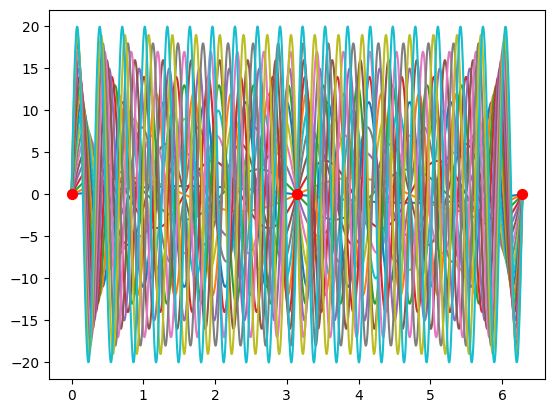

In [2]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(20) :
    y = (i+1)*np.sin((i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0], s=50, c="r", zorder=3)

Hay tanta incertidumbre que decides pedir más información y te dan otro punto.

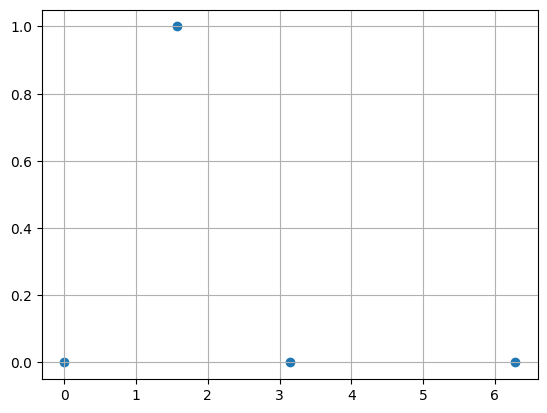

In [3]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1]); plt.grid()

asumimos que es una función contínua, infinitamente derivable (como la exponencial)

Con esta nueva información actualizas tus creencias y reduces la cantidad de formas en las que se conectan estos puntos (siguen siendo infinitas).

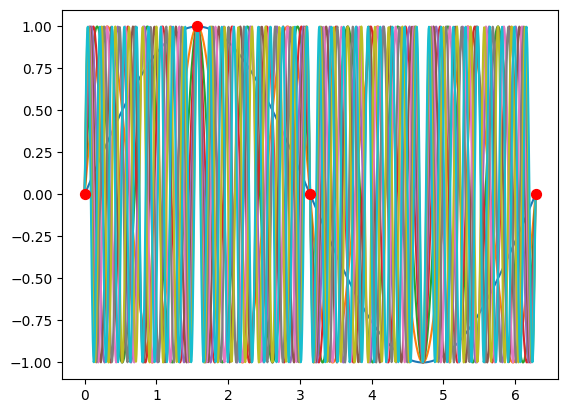

In [4]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(10) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Te pones a pensar: "Sí. Teóricamente hay infinitas funciones que pueden conectar estos puntos, pero sólo algunas tienen sentido dado mi contexto."

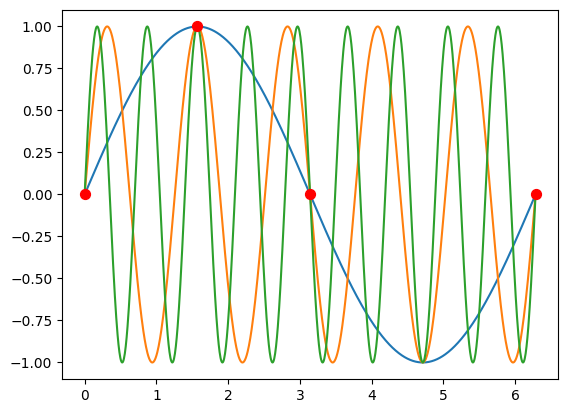

In [5]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(3) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Ahora sólo quedan algunos pocos candidatos dado el criterio que tienes. Hay incertidumbre sobre cuál de estos candidatos podría ser el que mejor se ajusta, así que decides pedir más información. ¿Qué información serviría más?
- Se podría pedir el valor de $y$ cuando $x=\frac{3\pi}{2}$, pero los candidatos que tenemos todos pasan por el mismo punto. Incluso si nos dieran la información, no ayudaría de mucho.
- Se podría pedir fuera del rango que tenemos, pero quizás la información no existe o dado el contexto del problema es imposible que estos puntos existan.

Nos asignan nuestro último punto.

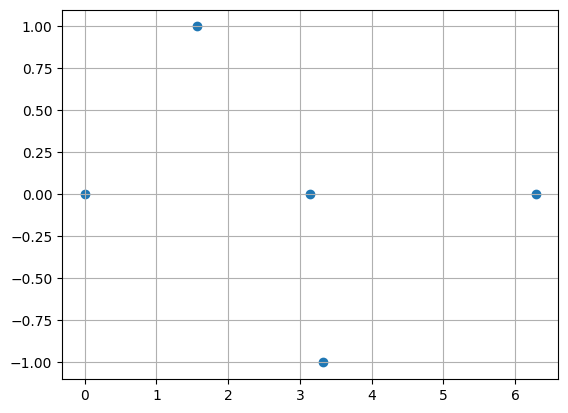

In [6]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1]); plt.grid()

Usamos esta nueva información (evidencia) junto con lo que conocíamos (anterior) y lo que creemos que es posible (verosimilitud) para decidir sobre una nueva función (posterior).

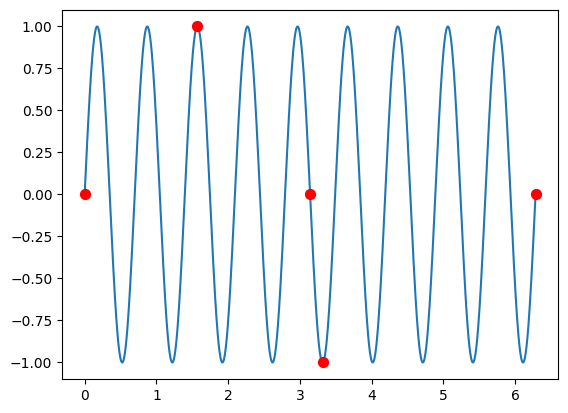

In [7]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); y = np.sin(9*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1], s=50, c="r", zorder=3)

Una forma de realizar este experimento es mediante un proceso gaussiano, que asume que la variable de salida es una variable aleatoria con distribución normal multivariada. Utilicemos la función que encontramos y asumamos que no sabemos cuál es.

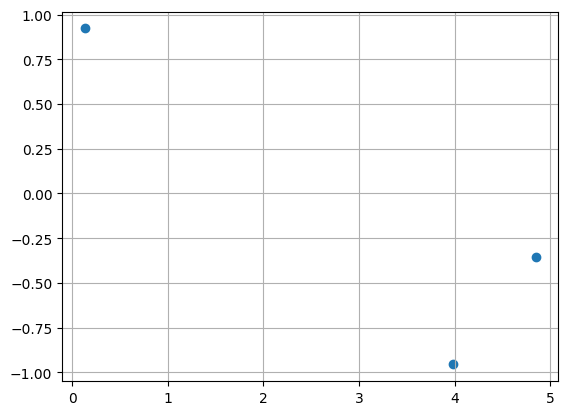

In [8]:
np.random.seed(10)
def f(x) :
    return np.sin(9*x)
X = np.random.uniform(0, 2*np.pi, 3).reshape([-1, 1])
plt.figure(); plt.scatter(X, f(X)); plt.grid()

Realizamos una regresión de proceso gaussiano para encontrar distribuciones que podrían darnos estas muestras

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [10]:
kernel = 1.0*RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
y = f(X)
gp.fit(X, y)

,kernel,1**2 * RBF(length_scale=1)
,alpha,1e-10
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,10
,normalize_y,False
,copy_X_train,True
,n_targets,None
,random_state,None
,kernel__k1,1**2
,kernel__k2,RBF(length_scale=1)
,kernel__k1__constant_value,1.0


In [11]:
vectorx = np.linspace(0, 2 * np.pi, 1000).reshape([-1, 1])
y_gorro= gp.predict(vectorx)

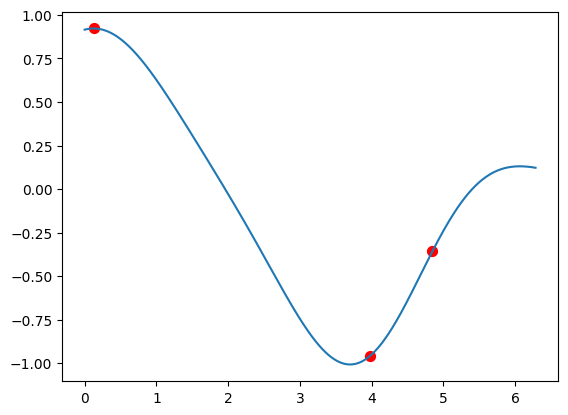

In [12]:
import matplotlib.pyplot as plt
plt.figure(); plt.scatter(X, y, s=50, c="r", label="Datos"); plt.plot(vectorx, y_gorro, label="Predicción GP")

Creamos un vector de valores posibles de $x$ y predecimos $y$ usando el resultado de la regresión.

In [13]:
y_gorro, std= gp.predict(vectorx, return_std=True)

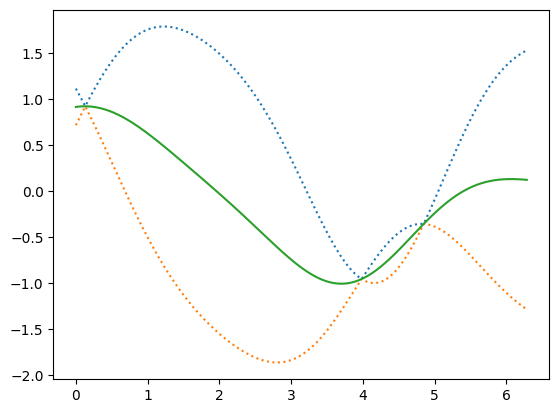

In [14]:
y_gorro_upper= y_gorro+1.96*std
y_gorro_lower=y_gorro-1.96*std

plt.plot(x, y_gorro_upper, ls = ":")
plt.plot(x,y_gorro_lower, ls = ":")
plt.plot(x, y_gorro)

In [15]:
x_nueva= x[np.argmax(std)]
x_nueva

np.float64(1.9811845563178874)

In [16]:
y_nueva= f(x_nueva)
y_nueva

np.float64(-0.8515291377333128)

Graficamos nuestra primera propuesta, utilizando el error estándar para dibujar nuestros intervalos de confianza.

In [17]:
X = np.vstack((X, x_nueva)) 
y_final=np.vstack((y, y_nueva))
gp.fit(X, y_final)

,kernel,1**2 * RBF(length_scale=1)
,alpha,1e-10
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,10
,normalize_y,False
,copy_X_train,True
,n_targets,None
,random_state,None
,kernel__k1,1**2
,kernel__k2,RBF(length_scale=1)
,kernel__k1__constant_value,1.0


In [18]:
x_gorro=np.linspace(0, 2*np.pi, 1000).reshape([-1, 1])
y_gorro = gp.predict(x_gorro)
y_gorro,std = gp.predict(x_gorro, return_std=True)

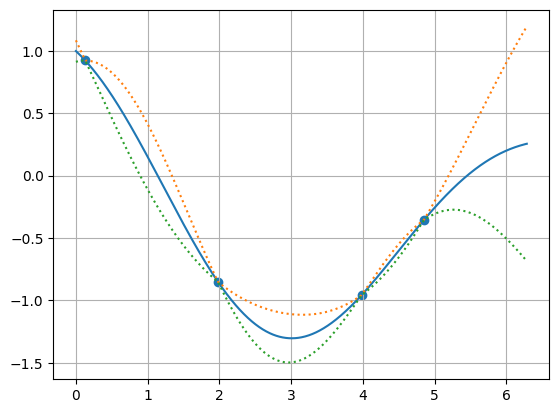

In [19]:
y_gorro_u = y_gorro + 1.96*std
y_gorro_l = y_gorro - 1.96*std
plt.figure();plt.scatter(X, f(X)); plt.plot(x_gorro, y_gorro);plt.plot(x_gorro, y_gorro_u, ls=':');plt.plot(x_gorro, y_gorro_l, ls=':');plt.grid()

Podemos ver que necesitamos más muestras debido a que hay mucha incertidumbre en algunas partes de nuestro dominio. Hay varios criterios para decidir cómo pedir muestras:
- Maximizar (busco mi predicción del máximo actual y pido esa medida)
- Minimizar (busco mi predicción del mínimo actual y pido esa medida)
- Reducir incertidumbre (busco el punto donde mi intervalo de confianza es más grande y pido esa medida)

Y repetimos el proceso ya con nueva información.

Repitamos el proceso 30 veces con una función distinta.

$$ f(x) = \sin{(\frac{x}{3})} + \cos{(2x)},\ \ \ \ x \in [-5\pi, 5\pi] $$

### Actividad

1. Modificar el comportamiento de selección para elegir el máximo de las predicciones como el siguiente punto.
2. Modificar el comportamiento de selección para elegir el mínimo de las predicciones como el siguiente punto.

/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a si

Iter 01: x_next = -10.6946, y_next = -0.4135
Iter 02: x_next = -6.2942, y_next = 0.1356
Iter 03: x_next = 12.4862, y_next = 0.1348
Iter 04: x_next = 15.7080, y_next = 0.1340
Iter 05: x_next = -3.1667, y_next = 0.1285
Iter 06: x_next = -8.4944, y_next = -0.5911
Iter 07: x_next = -12.8791, y_next = 1.7240
Iter 08: x_next = 2.0823, y_next = 0.1190


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a si

Iter 09: x_next = 10.6003, y_next = -1.0854
Iter 10: x_next = 5.9642, y_next = 1.7175
Iter 11: x_next = 14.1049, y_next = -1.9979
Iter 12: x_next = -4.7226, y_next = -1.9998
Iter 13: x_next = -15.7080, y_next = 1.8660
Iter 14: x_next = -1.6109, y_next = -1.5083


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a si

Iter 15: x_next = -9.5945, y_next = 0.9995
Iter 16: x_next = -7.3943, y_next = -1.2326
Iter 17: x_next = -11.7947, y_next = 0.7378
Iter 18: x_next = 1.0137, y_next = -0.1094
Iter 19: x_next = 3.1510, y_next = 1.8674
Iter 20: x_next = -13.9321, y_next = 0.0806
Iter 21: x_next = 9.5945, y_next = 0.8864


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a si

Iter 22: x_next = 11.5433, y_next = -1.1066
Iter 23: x_next = 6.8442, y_next = 1.1917
Iter 24: x_next = 5.0684, y_next = 0.2359
Iter 25: x_next = 14.9065, y_next = -0.9995
Iter 26: x_next = -3.9368, y_next = -0.9864
Iter 27: x_next = -0.8565, y_next = -0.4234
Iter 28: x_next = 13.2720, y_next = -0.7999


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/2821577274.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")


Iter 29: x_next = -5.5555, y_next = -0.8455
Iter 30: x_next = -2.3809, y_next = -0.6634


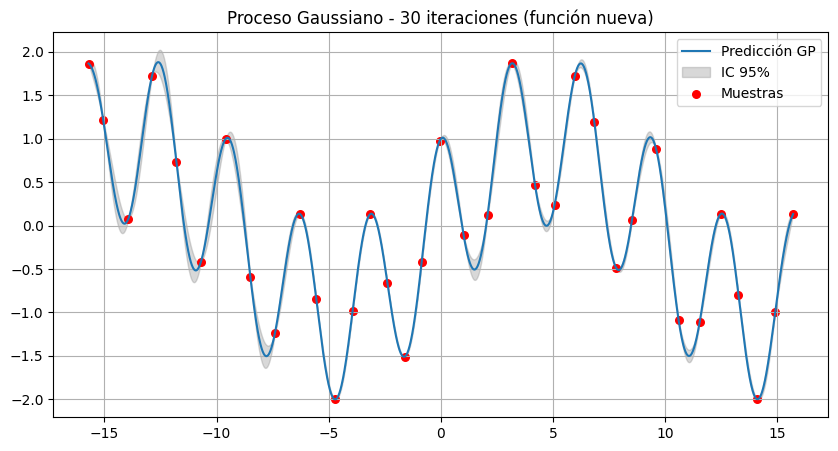

In [26]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(10)

#  Nueva función y dominio
def f(X):
    # acepta X como array 2D y devuelve 1D
    X = np.asarray(X)
    return (np.sin(X.ravel() / 3) + np.cos(2 * X.ravel())).ravel()

X = np.random.uniform(-5 * np.pi, 5 * np.pi, 5).reshape(-1, 1)  # puntos iniciales
y = f(X)

# configurar GP
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True)

# grid de evaluación
x_grid = np.linspace(-5 * np.pi, 5 * np.pi, 2000).reshape(-1, 1)

# proceso iterativo: añadir 30 puntos
n_iter = 30
for it in range(n_iter):
    gp.fit(X, y)
    y_pred, std = gp.predict(x_grid, return_std=True)
    # criterio: máxima incertidumbre (exploración)
    x_next = x_grid[np.argmax(std)].reshape(1, -1)
    y_next = f(x_next)
    # añadir nuevo punto
    X = np.vstack((X, x_next))
    y = np.hstack((y, y_next))
    # opcional: mostrar progreso
    print(f"Iter {it+1:02d}: x_next = {float(x_next):.4f}, y_next = {float(y_next):.4f}")

# ajuste final y visualización
gp.fit(X, y)
y_mean, y_std = gp.predict(x_grid, return_std=True)

plt.figure(figsize=(10,5))
plt.plot(x_grid, y_mean, label="Predicción GP")
plt.fill_between(x_grid.ravel(), y_mean - 1.96*y_std, y_mean + 1.96*y_std, color="grey", alpha=0.3, label="IC 95%")
plt.scatter(X, y, c="r", s=30, label="Muestras")
plt.title("Proceso Gaussiano - 30 iteraciones (función nueva)")
plt.legend(); plt.grid()

- La curva predicha (línea azul) se ajusta muy bien a los puntos que tienen valores altos.
- Los nuevos puntos se acumulan rápidamente en las zonas que ya parecían buenas, confirmando que son picos (por ejemplo, cerca de x≈−12.8 y x≈6). 
- Los intervalos de confianza (zona gris) se vuelven muy angostos en esos picos, lo que demuestra una alta confianza en su valor.
- Como el algoritmo se obsesionó con los picos evidentes, dejó grandes áreas del dominio sin probar (los valles), donde la incertidumbre se mantiene muy alta. Si hubiera un pico oculto y más alto en esas zonas no muestreadas, el algoritmo no lo habría encontrado.

/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 7 iteration(s) (status=2):
ABNORMAL: 

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/.venv/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 5 iteration(s) (status=2):
ABNORMAL: 

You might also want 

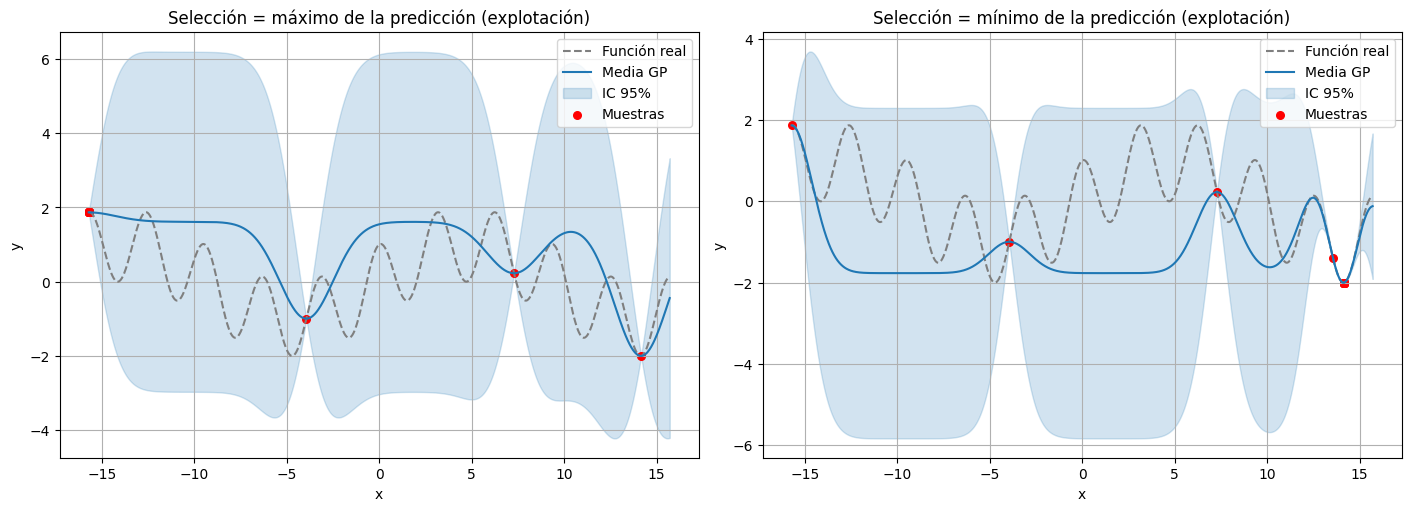

Último punto (max): -15.707963267948966 -> y = 1.8660254037844386
Último punto (min): 14.135594572458576 -> y = -1.9999949179650427


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/4287417568.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Último punto (max):", float(X_max[-1]), "-> y =", float(y_max[-1]))
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_32180/4287417568.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Último punto (min):", float(X_min[-1]), "-> y =", float(y_min[-1]))


In [27]:
np.random.seed(42)

# función
def f(x):
    x = np.asarray(x)
    return (np.sin(x.ravel() / 3) + np.cos(2 * x.ravel())).ravel()

# dominio 
x_dominio = np.linspace(-5 * np.pi, 5 * np.pi, 1000).reshape(-1, 1)
y_real = f(x_dominio)


X0 = np.random.uniform(-5 * np.pi, 5 * np.pi, 3).reshape(-1, 1)
y0 = f(X0)


kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, normalize_y=True)

def run_experiment(selection='max', X_init=None, y_init=None, n_iter=30):
    X = X_init.copy()
    y = y_init.copy()
    for it in range(n_iter):
        gp.fit(X, y)
        y_pred, std = gp.predict(x_dominio, return_std=True)
        if selection == 'max':
            idx = np.argmax(y_pred)
        else:
            idx = np.argmin(y_pred)
        x_next = x_dominio[idx].reshape(1, -1)
        y_next = f(x_next)
        X = np.vstack((X, x_next))
        y = np.hstack((y, y_next))
    gp.fit(X, y)
    y_mean, y_std = gp.predict(x_dominio, return_std=True)
    return X, y, y_mean, y_std

# ejecutar 
X_max, y_max, ymean_max, ystd_max = run_experiment('max', X0, y0, n_iter=30)
X_min, y_min, ymean_min, ystd_min = run_experiment('min', X0, y0, n_iter=30)

# graficar resultados lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# configuración 
for ax, title, Xs, Ys, Ym, Ysdt in [
    (axes[0], "Selección = máximo de la predicción (explotación)", X_max, y_max, ymean_max, ystd_max),
    (axes[1], "Selección = mínimo de la predicción (explotación)", X_min, y_min, ymean_min, ystd_min)
]:
    ax.plot(x_dominio, y_real, ls='--', color='tab:gray', label='Función real')
    ax.plot(x_dominio, Ym, color='tab:blue', label='Media GP')
    ax.fill_between(x_dominio.ravel(), Ym - 1.96*Ysdt, Ym + 1.96*Ysdt, color='tab:blue', alpha=0.2, label='IC 95%')
    ax.scatter(Xs, Ys, c='r', s=30, label='Muestras')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend(loc='upper right')

plt.show()

# últimos puntos
print("Último punto (max):", float(X_max[-1]), "-> y =", float(y_max[-1]))
print("Último punto (min):", float(X_min[-1]), "-> y =", float(y_min[-1]))

Profe, está muy fea esta gráfica y no se si esté bien, pero en base a esa gráfica, podemos interpretar lo siguiente: 
- La curva predicha de la línea azul sigue y se ajusta muy bien a las zonas que tienen valores bajos.
- Los nuevos puntos se concentran en los valles de la función
- Los intervalos de confianza también son muy angostos en estos valles, mostrando alta certidumbre de que esos son, de hecho, los puntos más bajos en esa región.
- Al enfocarse solo en la minimización, el algoritmo ignoró la búsqueda de los valores más altos (los picos). Creo que solamente se exploró una fracción limitada del dominio.